# AI프렌즈 시즌1 온도 추정 경진대회

데이터 설명
-     대전지역에서 측정한 실내외 19곳의 센서데이터와, 주변 지역의 기상청 공공데이터를 semi-비식별화하여 제공합니다. 

-     센서는 온도를 측정하였습니다. 

-     모든 데이터는 시간 순으로 정렬 되어 있으며 10분 단위 데이터 입니다. 

-     예측 대상(target variable)은 Y18입니다. 


train.csv 
-     30일 간의 기상청 데이터 (X00~X39) 및 센서데이터(온도) (Y00~Y17)
-     이후 3일 간의 기상청 데이터 (X00~X39) 및 센서데이터(온도) (Y18)

test.csv 
-     train.csv 기간 이후 80일 간의 기상청 데이터 (X00~X39)

In [48]:
group_1 = ['X00', 'X07', 'X28', 'X31', 'X32'] # 기온
group_2 = ['X01', 'X06', 'X22', 'X27', 'X29'] # 현지기압
group_3 = ['X02', 'X03', 'X18', 'X24', 'X26'] # 풍속
group_4 = ['X04', 'X10', 'X21', 'X36', 'X39'] # 일일 누적강수량
group_5 = ['X05', 'X08', 'X09', 'X23', 'X33'] # 해면기압
group_6 = ['X11', 'X14', 'X16', 'X19', 'X34'] # 일일 누적일사량
group_7 = ['X12', 'X20', 'X30', 'X37', 'X38'] # 습도
group_8 = ['X13', 'X15', 'X17', 'X25', 'X35'] # 풍향


In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
train = pd.read_csv("C:/dataset/AIFrenz_Season1/train.csv")
test = pd.read_csv("C:/dataset/AIFrenz_Season1/test.csv")
sample_submission = pd.read_csv("C:/dataset/AIFrenz_Season1/sample_submission.csv")

In [15]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [17]:
test.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,...,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,...,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,...,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,...,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,...,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


In [18]:
sample_submission.head()

,id,Y18
0,4752,0
1,4753,0
2,4754,0
3,4755,0
4,4756,0


In [19]:
train.shape
test.shape
sample_submission.shape

(4752, 60)

(11520, 41)

(11520, 2)

In [78]:
target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18']

In [82]:
# Y18이 NOT NULL인 데이터

train[~train['Y18'].isnull()]['Y18']

4320    20.5
4321    20.5
4322    20.5
4323    20.5
4324    20.5
4325    20.5
4326    20.5
4327    20.5
4328    20.5
4329    20.5
4330    20.5
4331    20.5
4332    20.5
4333    20.5
4334    20.5
4335    20.5
4336    20.0
4337    20.0
4338    20.0
4339    19.5
4340    19.0
4341    19.0
4342    19.0
4343    19.0
4344    19.0
4345    19.0
4346    19.0
4347    19.0
4348    19.0
4349    19.0
        ... 
4722    26.0
4723    25.5
4724    25.5
4725    25.0
4726    24.5
4727    24.5
4728    24.0
4729    24.0
4730    23.5
4731    23.5
4732    23.0
4733    23.0
4734    23.0
4735    23.0
4736    23.0
4737    23.0
4738    23.0
4739    23.0
4740    23.0
4741    22.5
4742    22.5
4743    22.0
4744    22.0
4745    22.0
4746    22.0
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Name: Y18, Length: 432, dtype: float64

In [22]:
y18 = train[~train['Y18'].isnull()]['Y18'].reset_index(drop= True)

In [23]:
y18.head()

0    20.5
1    20.5
2    20.5
3    20.5
4    20.5
Name: Y18, dtype: float64

In [24]:
# y18과 똑같은 개수(432개)의 Y00 ~ Y17 데이터
# 3888 ~ 4319 -> 432개

no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)

In [34]:
train[(train['Y18'].isnull()) & (train['id'] > 3887)]

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
3888,3888,17.9,990.8,1.4,1.5,0.0,1010.6,991.5,19.8,1011.4,...,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,NaN
3889,3889,17.7,991.0,2.7,1.2,0.0,1010.6,991.4,19.6,1011.3,...,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,NaN
3890,3890,17.6,991.0,2.8,0.5,0.0,1010.6,991.5,19.5,1011.5,...,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,NaN
3891,3891,17.6,991.0,2.1,1.5,0.0,1010.6,991.5,19.4,1011.5,...,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,NaN
3892,3892,17.0,991.0,1.9,1.3,0.0,1010.6,991.4,19.2,1011.5,...,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,NaN
3893,3893,16.7,990.9,1.8,1.2,0.0,1010.6,991.4,19.1,1011.5,...,17.0,17.5,17.0,18.0,17.0,17.0,16.5,18.0,16.5,NaN
3894,3894,16.6,991.0,2.1,1.7,0.0,1010.6,991.5,19.0,1011.6,...,17.0,17.5,17.0,18.0,17.0,17.0,16.5,18.0,16.5,NaN
3895,3895,16.8,991.0,1.6,2.0,0.0,1010.6,991.3,18.9,1011.4,...,17.0,17.5,16.5,18.0,17.0,17.0,16.5,18.0,16.5,NaN
3896,3896,17.0,990.9,1.5,2.1,0.0,1010.7,991.4,18.8,1011.6,...,16.5,17.0,16.5,18.0,17.0,16.5,16.5,17.5,16.5,NaN
3897,3897,17.1,990.9,1.7,1.3,0.0,1010.7,991.3,18.8,1011.4,...,16.5,17.0,16.5,17.5,17.0,16.5,16.5,17.5,16.5,NaN


In [25]:
no_y18

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5
5,19.5,20.0,20.0,25.0,25.0,19.0,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,16.5,18.0,16.5
6,19.5,19.5,19.5,25.0,25.0,19.0,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,16.5,18.0,16.5
7,19.5,19.5,19.5,24.5,25.0,19.0,18.0,18.5,19.0,17.0,17.5,16.5,18.0,17.0,17.0,16.5,18.0,16.5
8,19.0,19.5,19.5,24.5,24.5,19.0,18.0,18.5,18.5,16.5,17.0,16.5,18.0,17.0,16.5,16.5,17.5,16.5
9,19.0,19.0,19.5,24.5,24.5,19.0,17.5,18.5,18.5,16.5,17.0,16.5,17.5,17.0,16.5,16.5,17.5,16.5


In [35]:
check_target = pd.concat([no_y18, y18], axis = 1)
check_target.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5


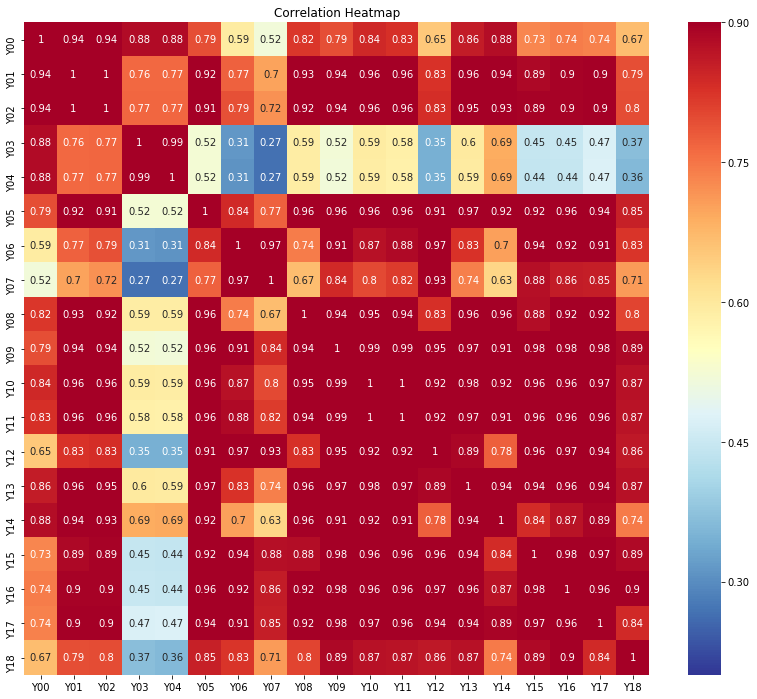

In [37]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

In [39]:
check_target.reset_index(inplace = True)

In [40]:
check_target.head()

,index,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5


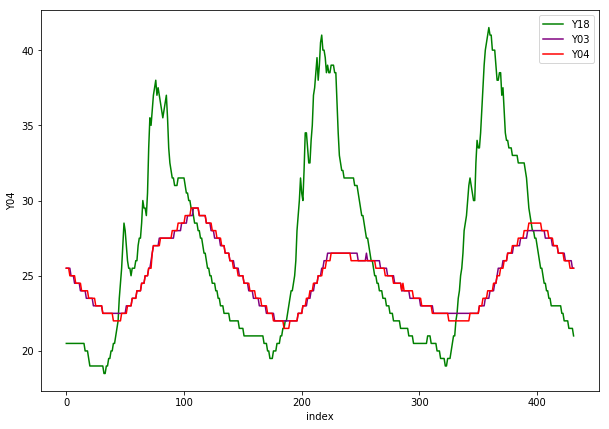

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y03', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y04', color='red', ax=ax)
plt.legend(['Y18', 'Y03', 'Y04'])
plt.show()

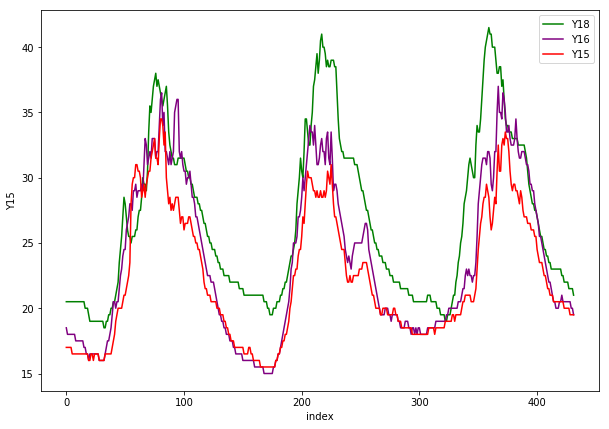

In [42]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y16', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y15', color='red', ax=ax)
plt.legend(['Y18', 'Y16', 'Y15'])
plt.show()

In [ ]:
## Y18과 관련성이 적은 Y03과 Y04를 삭제?

## [전이학습 Transfer learning 이란?]

- 트랜스퍼 러닝이란 딥러닝을 feature extractor로만 사용하고 그렇게 추출한 피처를 가지고 다른 모델을 학습하는 것
- 기존의 만들어진 모델을 사용하여 새로운 모델을 만들시 학습을 빠르게 하며, 예측을 더 높이는 방법
- 일반적으로 VGG,ResNet,gooGleNet등 이미 이러한 사전에 학습이 완료된 모델(Pre-Training Model)을 가지고 우리가 원하는 학습에 미세 조정 즉, 작은변화를 이용하여 학습시키는 방법이 Transfer Learning이다. 
- 이미학습된 weight들을 transfer(전송)하여 자신의 model에 맞게 학습을 시키는 방법
- 신경망의 이러한 재학습 과정을 세부 조정(fine-tuning)이라 부름
- 실제로 CNN을 구축하는 경우 대부분 처음부터 (random initialization) 학습하지는 않는다. 
-  ImageNet과 같은 대형 데이터셋을 사용해서 pretrain된 ConvNet 을 사용한다. 



- 데이터가 자주 갱신될수록 전이학습이 필요해진다.
- 데이터가 자주 갱신된다는 것은 특정 시간대에 수집된 데이터는 다른 시간대에 수집된 데이터의 분포를 따르지 않는다는 것이다. 

In [84]:
## Y00 ~ Y17을 가지고 하나의 새로운 column YY으로 표현 (Y18과 유사한 값을 가지는)
## X00 ~ X39를 feature로 YY를 예측하는 회귀 모델을 선정 및 학습

## PCA를 이용하여 Y00 ~ Y17 데이터를 하나의 차원으로 축소해보자

In [55]:
df = train[(train['Y18'].isnull())][no_y18_target].reset_index(drop = True)

In [56]:
df.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5


In [57]:
df.shape

(4320, 18)

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
# 스케일링 후 PCA
df_s = StandardScaler().fit_transform(df)

pca = PCA(n_components=1)
transformed = pca.fit_transform(df_s)

transformed.shape

(4320, 1)

In [65]:
transformed

array([[-6.92010614],
       [-7.0324987 ],
       [-7.21681657],
       ...,
       [-1.01989993],
       [-1.12933912],
       [-1.19366837]])

In [86]:
# 스케일링 안하고 PCA
pca = PCA(n_components=1)
transformed = pca.fit_transform(df)
transformed

array([[-54.57945876],
       [-55.56156315],
       [-56.57707634],
       ...,
       [-11.27664922],
       [-12.10547012],
       [-12.54190112]])

In [93]:
# lle를 이용한 차원축소

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=1, n_neighbors=10, random_state=42)
lle.fit(df)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=1,
            n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
            random_state=42, reg=0.001, tol=1e-06)

In [94]:
# 스케일링 X
transformed2 = lle.transform(df)
transformed2

array([[-0.0221663 ],
       [-0.02229007],
       [-0.0221765 ],
       ...,
       [-0.00659197],
       [-0.00686547],
       [-0.00672252]])

In [95]:
# 스케일링 O
lle.fit(df_s)
transformed3 = lle.transform(df_s)
transformed3

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=1,
            n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
            random_state=42, reg=0.001, tol=1e-06)

array([[0.01382889],
       [0.01386875],
       [0.01419831],
       ...,
       [0.00546635],
       [0.00455725],
       [0.002785  ]])

In [96]:
## 차원축소가 생각한대로 되지 않았음....

<Figure size 648x432 with 0 Axes>

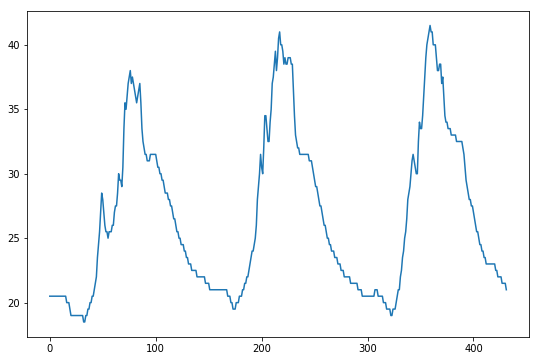

In [92]:
## Y는 온도 데이터 -> 시간대에 따른 차이가 존재할 것

# y18(3일 간의 온도 데이터) 시각화
plt.figure(figsize=(9, 6))
plt.plot(y18)
plt.show()

In [90]:
col_y17 = []
for i in range(18):
    col_y17.append('Y{:02d}'.format(i))

<Figure size 648x432 with 0 Axes>

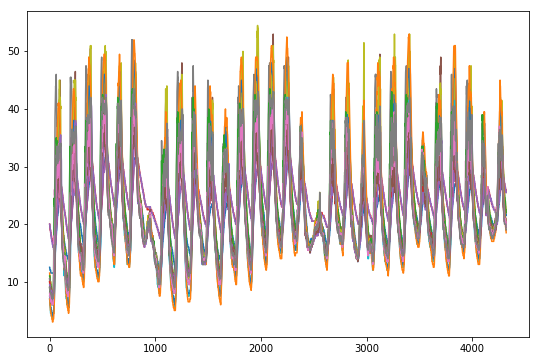

In [99]:
plt.figure(figsize=(9, 6))
plt.plot(df[col_y17])
plt.show()

<Figure size 648x432 with 0 Axes>

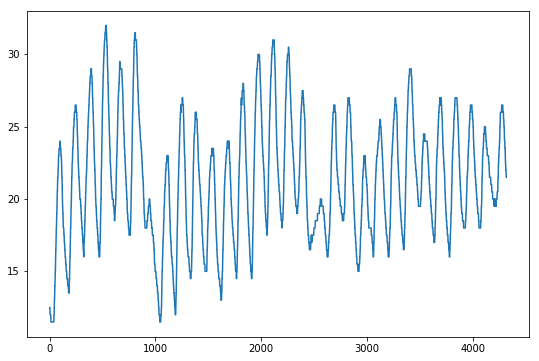

In [100]:
plt.figure(figsize=(9, 6))
plt.plot(df['Y00'])
plt.show()